In [16]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [ ]:
# In here we show how a random walk is generated, by taking a random choice of two possible moves 'up' or 'down'.

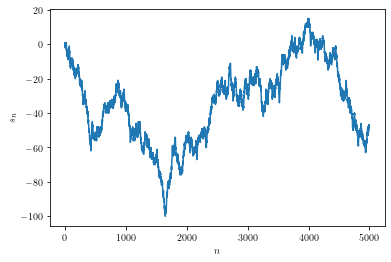

In [63]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


nstep = 5000
pos_vec = np.zeros(nstep)
pos_time = np.arange(0, nstep, 1)
directions = ["up", "down"]


for i in range(1,nstep,1):
    p = random.choice(directions)
    if p == "down":
        pos_vec[i] = pos_vec[i-1]-1
    else:
        pos_vec[i] = pos_vec[i-1]+1

        
# plot config
plt.rc('text', usetex=True)
plt.rc('font', family='serif') 
plt.xlabel('$n$')
plt.ylabel('$s_n$')
        
plt.plot(pos_time,pos_vec)
plt.savefig('rd_walk.pdf')  
plt.show()

In [ ]:
# In this code we will compute the quadratic mean displacement (QMD) to verify that the QMD goes, in mean, as sqrt(N) where N
# is the total number of steps in the random walk.

In [32]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

nstep = 5000
nexp = 200 #nexp is the total number of experiments we will use to measure the average QMD
pos_time = np.arange(0, nstep, 1)
directions = ["up", "down"]
qdist = np.zeros(nexp)

for k in range(1,nexp,1):
    pos_vec = np.zeros(nstep)
    x0 = 0
    pos_vec[0] = x0
    for i in range(1,nstep,1):
        p = random.choice(directions)
        if p == "down":
            pos_vec[i] = pos_vec[i-1]-1
        else:
            pos_vec[i] = pos_vec[i-1]+1
    qdist[k] = (pos_vec[0] - pos_vec[nstep-1])**2
    
# in here we have already filled qdist with the squared distance between the last step and the initial condition for each exp
# let's now compute the expected value of the QD after N_exp experiments
s = 0
for i in range(1,nexp):
    s = s + qdist[i]
    
sqQMD = np.sqrt(s/nexp)

#print(sqQMD) #this is the square root of the mean value of the quadratic distance before performing N_exp experiments. Now we need to compute the dev
# compute the statistical error on QMD
s = 0
for i in range(1,nexp):
    s = s + (np.sqrt(qdist[i])-sqQMD)**2
sqQMDerr = np.sqrt(s/(nexp*(nexp-1)))
#print(stddev)

print('The QMD is ' +str(sqQMD) + u"\u00B1" +str(sqQMDerr))

The QMD is 71.5396044160156±3.3827924679094465


In [ ]:
# in here we are going to compute the QMD for different number of steps in order to verify the theoretical predictions

[   5.    7.   10.   15.   22.   33.   49.   73.  109.  163.  244.  366.
  549.  823. 1234. 1851. 2776. 4164.]


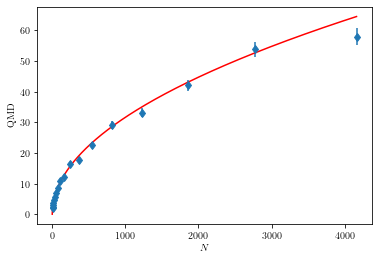

In [57]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


numpoints = 18
liststeps =np.zeros(numpoints)
liststeps[0] = 5
for i in range(1,numpoints,1):
    liststeps[i] = int(liststeps[i-1]*1.5)

vsqQMD = np.zeros(numpoints)
vsqQMDerr = np.zeros(numpoints)
    
nexp = 200 #nexp is the total number of experiments we will use to measure the average QMD
pos_time = np.arange(0, nstep, 1)
directions = ["up", "down"]
qdist = np.zeros(nexp)

#print(liststeps) # un# this line to see which are the N_step simulations performed.

r = 0
for l in liststeps:
    nstep = int(l)
    for k in range(1,nexp,1):
        pos_vec = np.zeros(nstep)
        x0 = 0
        pos_vec[0] = x0
        for i in range(1,nstep,1):
            p = random.choice(directions)
            if p == "down":
                pos_vec[i] = pos_vec[i-1]-1
            else:
                pos_vec[i] = pos_vec[i-1]+1
        qdist[k] = (pos_vec[0] - pos_vec[nstep-1])**2
    
    # in here we have already filled qdist with the squared distance between the last step and the initial condition for each exp
    # let's now compute the expected value of the QD after N_exp experiments
    s = 0
    for i in range(1,nexp):
        s = s + qdist[i]
    
    sqQMD = np.sqrt(s/nexp)

    #print(sqQMD) #this is the square root of the mean value of the quadratic distance before performing N_exp experiments. Now we need to compute the dev
    # compute the statistical error on QMD
    s = 0
    for i in range(1,nexp):
        s = s + (np.sqrt(qdist[i])-sqQMD)**2
    sqQMDerr = np.sqrt(s/(nexp*(nexp-1)))
    #print(stddev)
    
    vsqQMD[r] = sqQMD
    vsqQMDerr[r] = sqQMDerr
    r += 1
    
# plot config 
plt.rc('text', usetex=True)
plt.rc('font', family='serif') 
plt.xlabel('$N$')
plt.ylabel('QMD')
   
t = np.arange(0, liststeps[numpoints-1], 1)
ft = np.sqrt(t)
    

plt.rc('text', usetex=True)
plt.rc('font', family='serif') 
plt.xlabel('$n$')
plt.ylabel('QMD')    
    
plt.errorbar(liststeps,vsqQMD,vsqQMDerr, fmt="d", label=QMD)
plt.plot(t, ft, color='red')

plt.show()

In [ ]:
# Enhanced version of the last plot. Figure in .png format is saved in the folder containing the .py files.

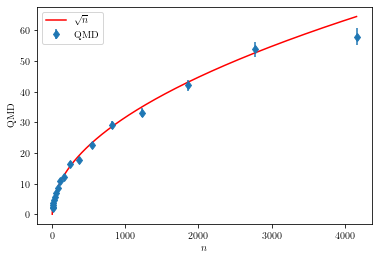

In [69]:
plt.xlabel('$n$')
plt.ylabel('QMD') 


plt.errorbar(liststeps,vsqQMD,vsqQMDerr, fmt="d", label='QMD')
plt.plot(t, ft, color='red', label = '$\sqrt{n}$')
plt.legend(loc="upper left")
plt.savefig('qmd.pdf')

plt.show()